In [1]:
# Digitized EEG channel locations & Preprocessed resting state EEG data:

In [2]:
#IMPORT

import matplotlib
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
import scipy.interpolate

# Digitized EEG channel locations:

In [3]:
'''
Polhemus PATRIOT Motion Tracking System (Polhemus, Colchester, VT, USA) localizer together 
with the Brainstorm toolbox was used to digitize the exact location of each electrode on a 
participant's head relative to three fiducial points.
'''

"\nPolhemus PATRIOT Motion Tracking System (Polhemus, Colchester, VT, USA) localizer together \nwith the Brainstorm toolbox was used to digitize the exact location of each electrode on a \nparticipant's head relative to three fiducial points.\n"

In [8]:
#IMPORT FILES LOCALIZED

import scipy.io
study = scipy.io.loadmat('Files/Localized/Loc1/brainstormstudy.mat')
sub = scipy.io.loadmat('Files/Localized/Loc1/sub-010005.mat')

In [9]:
#CHECK TYPE

print(type(study))
print(type(sub))

<class 'dict'>
<class 'dict'>


In [10]:
# SEARCH IN SUB THE INFORMTATION OF HEAD POINTS AND CHANNEL

HP = {key: sub[key] for key in sub.keys() & {'HeadPoints'}}
Chan = {key: sub[key] for key in sub.keys() & {'Channel'}}

In [44]:
#HEAD POINTS

data1 = list(HP.items())
HP1 = np.array(data1)

print(HP1)
print(HP1.shape)

#Selection delate array
HP2 = HP1[0][1]


[['HeadPoints'
  array([[(array([[ 1.05390162e-01, -7.54655022e-04,  1.09510858e-04,
         1.05562767e-01, -5.89822497e-04,  1.23496666e-03],
       [-3.39141038e-04,  7.53056392e-02, -7.50044597e-02,
         3.39141038e-04,  7.49013978e-02, -7.52025773e-02],
       [ 7.42615340e-05, -1.50498157e-04, -4.87955560e-04,
        -7.42615340e-05,  1.50498157e-04,  4.87955560e-04]]), array([[array(['NA'], dtype='<U2'), array(['LPA'], dtype='<U3'),
        array(['RPA'], dtype='<U3'), array(['NA'], dtype='<U2'),
        array(['LPA'], dtype='<U3'), array(['RPA'], dtype='<U3')]],
      dtype=object), array([[array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8')]], dtype=object))]],
      dtype=[('Loc', 'O'), ('Label', 'O'), ('Type', 'O')])]]
(1, 2)


In [12]:
#Final selected data of Head Points

HP_Cord = HP2[0][0]
HP_Cord

#3 arrays (4), 1r RPA, 2n NA, 3r LPA ( Left and Right Pre-Auricular )
# https://www.fieldtriptoolbox.org/faq/how_are_the_lpa_and_rpa_points_defined/


(array([[ 1.05390162e-01, -7.54655022e-04,  1.09510858e-04,
         1.05562767e-01, -5.89822497e-04,  1.23496666e-03],
       [-3.39141038e-04,  7.53056392e-02, -7.50044597e-02,
         3.39141038e-04,  7.49013978e-02, -7.52025773e-02],
       [ 7.42615340e-05, -1.50498157e-04, -4.87955560e-04,
        -7.42615340e-05,  1.50498157e-04,  4.87955560e-04]]), array([[array(['NA'], dtype='<U2'), array(['LPA'], dtype='<U3'),
        array(['RPA'], dtype='<U3'), array(['NA'], dtype='<U2'),
        array(['LPA'], dtype='<U3'), array(['RPA'], dtype='<U3')]],
      dtype=object), array([[array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8')]], dtype=object))

In [45]:
# Select CHANNEL DATA
data = list(Chan.items())
an_array = np.array(data)

print(an_array)

[['Channel'
  array([[(array(['Green_1_FP1'], dtype='<U11'), array([], dtype='<U1'), array(['EEG'], dtype='<U3'), array([[0.11221639],
       [0.03699045],
       [0.0599444 ]]), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8)),
        (array(['Green_2_FP2'], dtype='<U11'), array([], shape=(1, 0), dtype=float64), array(['EEG'], dtype='<U3'), array([[ 0.11411683],
       [-0.03592944],
       [ 0.06041879]]), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64)),
        (array(['Green_3_F7'], dtype='<U10'), array([], shape=(1, 0), dtype=float64), array(['EEG'], dtype='<U3'), array([[0.06099049],
       [0.07887165],
       [0.049688  ]]), array([], shape=(1, 0), dtype=float64), array([], shape=(1, 0), dtype=float64)),
        (array(['Green_4_F3'], dtype='<U10'), array([], shape=(1, 0), dtype=float64), array(['EEG'], dtype='<U3'), array([[0.06888137],
       [0.05800198],
       [0.10342762]]), array([], shape=(1, 0), dtype=float64)

In [14]:
#Select 3 points
data = an_array[0][1]
data1 = data[0]
print(data1.shape)
print(data1[0])
'''Print pots example'''
points = data1[0][3]
print(points)

(63,)
(array(['Green_1_FP1'], dtype='<U11'), array([], dtype='<U1'), array(['EEG'], dtype='<U3'), array([[0.11221639],
       [0.03699045],
       [0.0599444 ]]), array([], shape=(0, 0), dtype=uint8), array([], shape=(0, 0), dtype=uint8))
[[0.11221639]
 [0.03699045]
 [0.0599444 ]]


In [15]:
#Check other file

sub2 = scipy.io.loadmat('Files/Localized/Loc2/sub-010038.mat')

HP2N = {key: sub2[key] for key in sub2.keys() & {'HeadPoints'}}

#HEAD POINTS
data2N = list(HP2N.items())
HPN = np.array(data2N)

#Selection delate array
HP3N = HPN[0][1]

#Final selected data of Head Points

HP_Cor2d = HP3N[0][0]
HP_Cor2d


(array([[ 8.96352472e-02, -1.21132093e-04,  3.44172288e-04,
         8.87294485e-02, -1.59834123e-04, -6.32060726e-05],
       [ 8.59018413e-05,  6.49611087e-02, -6.48818974e-02,
        -8.59018413e-05,  6.42315104e-02, -6.43107217e-02],
       [ 5.79664414e-04,  2.27823637e-04,  5.77176585e-04,
        -5.79664414e-04, -2.27823637e-04, -5.77176585e-04]]), array([[array(['NA'], dtype='<U2'), array(['LPA'], dtype='<U3'),
        array(['RPA'], dtype='<U3'), array(['NA'], dtype='<U2'),
        array(['LPA'], dtype='<U3'), array(['RPA'], dtype='<U3')]],
      dtype=object), array([[array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8'),
        array(['CARDINAL'], dtype='<U8')]], dtype=object))

# Preprocessed resting state EEG data:

In [16]:
'''The folder contains preprocessed EEG data files after removing ICA components separately for eyes-closed (EC) 
and eyes-open (EO) conditions. Each participant (N= 202) have 4 files (2 for EC condition and 2 for EO). 
These .set and .fdt files have the following naming structure:

sub-BIDS_condition.fdt (.set)

*condition: eyes closed (EC) or eyes open(EO)
 BIDS number: 6-digit numbers created for data-paper (e.g., sub-010001)'''

'The folder contains preprocessed EEG data files after removing ICA components separately for eyes-closed (EC) \nand eyes-open (EO) conditions. Each participant (N= 202) have 4 files (2 for EC condition and 2 for EO). \nThese .set and .fdt files have the following naming structure:\n\nsub-BIDS_condition.fdt (.set)\n\n*condition: eyes closed (EC) or eyes open(EO)\n BIDS number: 6-digit numbers created for data-paper (e.g., sub-010001)'

In [18]:
import mne
import scipy

In [19]:
#EEGLAB (.set, .fdt)
dataset = scipy.io.loadmat('Files/Preprocessed/sub-010002_EC.set')

In [20]:
x=mne.io.read_raw_eeglab('Files/Preprocessed/sub-010002_EC.set', preload=True, verbose=True)

Reading Files/Preprocessed/sub-010002_EC.fdt
Reading 0 ... 119344  =      0.000 ...   477.376 secs...


In [21]:
type(x)

mne.io.eeglab.eeglab.RawEEGLAB

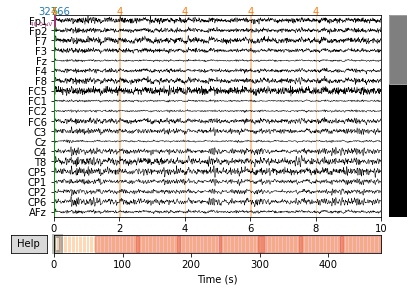

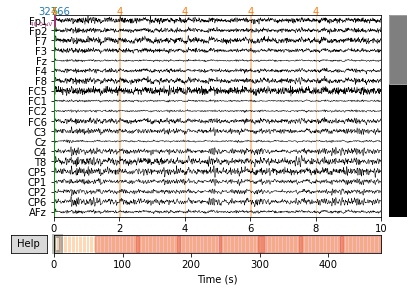

In [22]:
x.plot()

In [24]:
# place https://www.easycap.de/wp-content/uploads/2018/02/Easycap-10-based-electrode-layouts.pdf 

Channels = ['FP1','FP2','F7','F3','Fz','F4','F8','FC5','FC1','FC2','FC6','C3','Cz','C4','T8','CP5','CP1','CP2','CP6','AFz']
len(Channels)

20

In [30]:
'''plot the mean spectral density with the standard error of the mean only of the clean epochs, like a subplot for each channel (for EO and EC). Remember to use the BadTrials (e.g., from the sub-010005.mat) to remove all bad trials from the subject (if any). '''
print(x)
print(x.info)

<RawEEGLAB | sub-010002_EC.fdt, 59 x 119345 (477.4 s), ~53.9 MB, data loaded>
<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F7, F3, Fz, F4, F8, FC5, FC1, FC2, FC6, C3, Cz, C4, ...
 chs: 59 EEG
 custom_ref_applied: False
 dig: 59 items (59 EEG)
 highpass: 0.0 Hz
 lowpass: 125.0 Hz
 meas_date: unspecified
 nchan: 59
 projs: []
 sfreq: 250.0 Hz
>


Effective window size : 8.192 (s)


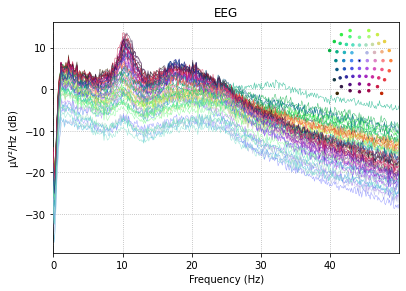

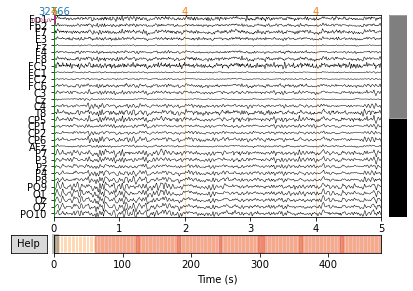

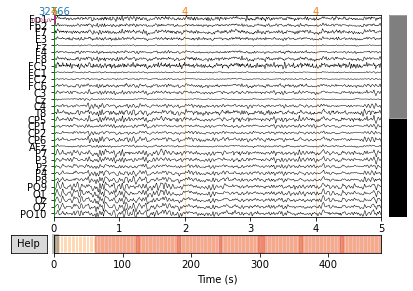

In [31]:
'''Raw objects also have several built-in plotting methods; here we show the power spectral density (PSD) for each sensor type with plot_psd(), as well as a plot of the raw sensor traces with plot(). In the PSD plot, we’ll only plot frequencies below 50 Hz (since our data are low-pass filtered at 40 Hz). In interactive Python sessions, plot() is interactive and allows scrolling, scaling, bad channel marking, annotation, projector toggling, etc.'''

x.plot_psd(fmax=50)
x.plot(duration=5, n_channels=30)

Fitting ICA to data using 59 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 20 components
Fitting ICA took 4.0s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
Not setting metadata
238 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped
Not setting metadata
Not setting metadata
238 matching events found
No baseline correction applied
0 projection items activated
0 bad epochs dropped


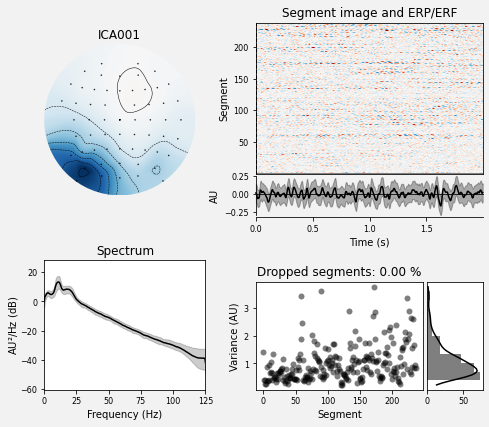

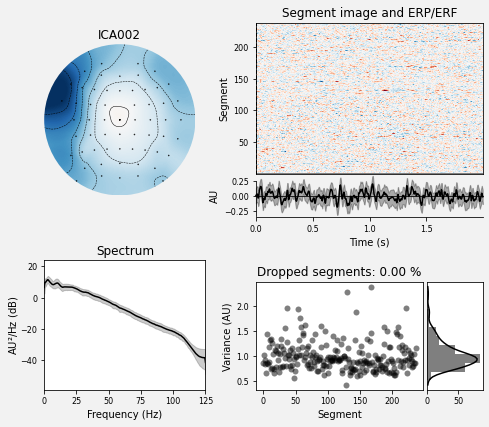

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [33]:
# MNE-Python supports a variety of preprocessing approaches and techniques (maxwell filtering, signal-space projection, 
# independent components analysis, filtering, downsampling, etc).

ica = mne.preprocessing.ICA(n_components=20, random_state=97, max_iter=800)
ica.fit(x)
ica.exclude = [1, 2]  # details on how we picked these are omitted here
ica.plot_properties(x, picks=ica.exclude)

# TO DO LIST - frequency all together au^2/Hz - from all. (SPECTRUM)

In [41]:
#SEARCH EVENTS

events = mne.find_events(x, stim_channel = 'EC')
print(events[:5])  # show the first 5

ValueError: No stim channel found to extract event triggers.

In [42]:

'''#Events

epochs = mne.Epochs(x, events, event_id=1, tmin=-0.2, tmax=1,
                    picks=picks, baseline=(None, 0),
                    reject=dict(grad=4000e-13), preload=True)'''

'#Events\n\nepochs = mne.Epochs(x, events, event_id=1, tmin=-0.2, tmax=1,\n                    picks=picks, baseline=(None, 0),\n                    reject=dict(grad=4000e-13), preload=True)'

In [52]:
'''s = mne.io.read_raw_egi('Files/Preprocessed/sub-010002_EC.set')'''

"s = mne.io.read_raw_egi('Files/Preprocessed/sub-010002_EC.set')"

In [64]:
print(x.ch_names)
print('_')
print(len(x.ch_names))

['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FC5', 'FC1', 'FC2', 'FC6', 'C3', 'Cz', 'C4', 'T8', 'CP5', 'CP1', 'CP2', 'CP6', 'AFz', 'P7', 'P3', 'Pz', 'P4', 'P8', 'PO9', 'O1', 'Oz', 'O2', 'PO10', 'AF7', 'AF3', 'AF4', 'AF8', 'F5', 'F1', 'F2', 'F6', 'FT7', 'FC3', 'FC4', 'FT8', 'C5', 'C1', 'C2', 'C6', 'CP3', 'CPz', 'CP4', 'TP8', 'P5', 'P1', 'P2', 'P6', 'PO7', 'PO3', 'POz', 'PO4', 'PO8']
_
59


In [60]:
datax = x._data

In [61]:
datax

array([[ 3.40185380e-06, -1.15108478e-06, -3.05285215e-06, ...,
        -5.36247635e-06, -1.07306349e-06,  1.44466424e-06],
       [ 2.23387265e-06,  2.42891002e-06, -1.71568549e-06, ...,
        -4.02878571e-06, -3.61581445e-06, -1.67563868e-06],
       [-3.92220187e-06, -5.43169308e-06, -7.98797464e-06, ...,
        -2.61301637e-06, -2.29822683e-06, -1.08431530e-06],
       ...,
       [-9.06954002e-06, -1.13523130e-05, -1.27948065e-05, ...,
         8.56233406e-06,  6.84639597e-06,  3.32538366e-06],
       [-6.15342760e-06, -4.73464394e-06, -4.12048912e-06, ...,
         8.53900814e-06,  6.83162975e-06,  3.94542956e-06],
       [-2.96153688e-06, -6.27886891e-07, -1.67830978e-08, ...,
         3.16720605e-06,  7.71605730e-06,  1.06859007e-05]])

In [62]:
datax.shape

(59, 119345)

In [63]:
type(datax)

numpy.ndarray

In [67]:
x.get_data()

array([[ 3.40185380e-06, -1.15108478e-06, -3.05285215e-06, ...,
        -5.36247635e-06, -1.07306349e-06,  1.44466424e-06],
       [ 2.23387265e-06,  2.42891002e-06, -1.71568549e-06, ...,
        -4.02878571e-06, -3.61581445e-06, -1.67563868e-06],
       [-3.92220187e-06, -5.43169308e-06, -7.98797464e-06, ...,
        -2.61301637e-06, -2.29822683e-06, -1.08431530e-06],
       ...,
       [-9.06954002e-06, -1.13523130e-05, -1.27948065e-05, ...,
         8.56233406e-06,  6.84639597e-06,  3.32538366e-06],
       [-6.15342760e-06, -4.73464394e-06, -4.12048912e-06, ...,
         8.53900814e-06,  6.83162975e-06,  3.94542956e-06],
       [-2.96153688e-06, -6.27886891e-07, -1.67830978e-08, ...,
         3.16720605e-06,  7.71605730e-06,  1.06859007e-05]])